In [1]:
import pandas as pd
xls = pd.ExcelFile('yelp.xlsx')
df = xls.parse('yelp_data')
df.head()

R:\Anaconda\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,name,category_0,category_1,take_out,review_count,stars,city_id,state_id
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1


In [47]:
df_cities = xls.parse('cities')
df = pd.merge(left=df, right=df_cities, how='inner',left_on='city_id', right_on='id')
df_states = xls.parse('states')
df = pd.merge(left=df, right=df_states, how='inner', left_on='state_id', right_on='id')




R:\Anaconda\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
R:\Anaconda\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [11]:
del df['id_x']
del df['id_y']

In [13]:
df.groupby(['city'])

In [21]:
bars_rest = df['category_0'].isin(['Bars', 'Restaurants'])
df_bars_rest = df[bars_rest]
df_bars_rest

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,Bellevue,PA
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,Bellevue,PA
6,Luigi's Pizzeria,Restaurants,Pizza,True,18,4.0,1,1,Bellevue,PA
8,R & B's Pizza Place,Restaurants,Pizza,True,17,4.0,1,1,Bellevue,PA
9,Rusty Nail,Restaurants,American (Traditional),True,32,3.5,1,1,Bellevue,PA
...,...,...,...,...,...,...,...,...,...,...
537,Pho So 1,Restaurants,Vietnamese,True,763,3.5,12,2,Las Vegas,NV
538,Rice To-Go,Restaurants,Chinese,True,19,3.0,12,2,Las Vegas,NV
539,Wienerschnitzel,Restaurants,Fast Food,False,3,1.0,12,2,Las Vegas,NV
593,Sporting Chance Saloon,Bars,Nightlife,False,7,3.5,13,2,North Las Vegas,NV


In [23]:
pivot_state_cat = pd.pivot_table(df_bars_rest, index=['state', 'city', 'category_0'], values=['review_count', 'stars'])
pivot_state_cat

review_count     stars
state city            category_0                         
NV    Henderson       Bars           171.000000  3.000000
                      Restaurants    102.454545  3.181818
      Las Vegas       Bars            15.500000  4.000000
                      Restaurants    221.153846  3.153846
      North Las Vegas Bars             7.000000  3.500000
                      Restaurants     12.000000  3.000000
PA    Bellevue        Restaurants     14.000000  3.916667
      Braddock        Bars            26.000000  4.500000
      Carnegie        Bars            16.500000  4.000000
                      Restaurants     26.000000  3.125000
      Homestead       Bars            23.000000  2.500000
                      Restaurants      6.000000  2.500000
      Mc Kees Rocks   Bars             9.000000  3.500000
                      Restaurants      7.333333  3.333333
      Munhall         Restaurants      9.500000  3.500000
      Pittsburgh      Bars            20.000000  3.416667
                      Restaurants     67.000000  3.203704
      West Homestead  Bars            92.000000  2.500000
      West Mifflin    Restaurants      5.000000  4.333333

In [25]:
pivot_state_cat[['review_count', 'stars']]

review_count     stars
state city            category_0                         
NV    Henderson       Bars           171.000000  3.000000
                      Restaurants    102.454545  3.181818
      Las Vegas       Bars            15.500000  4.000000
                      Restaurants    221.153846  3.153846
      North Las Vegas Bars             7.000000  3.500000
                      Restaurants     12.000000  3.000000
PA    Bellevue        Restaurants     14.000000  3.916667
      Braddock        Bars            26.000000  4.500000
      Carnegie        Bars            16.500000  4.000000
                      Restaurants     26.000000  3.125000
      Homestead       Bars            23.000000  2.500000
                      Restaurants      6.000000  2.500000
      Mc Kees Rocks   Bars             9.000000  3.500000
                      Restaurants      7.333333  3.333333
      Munhall         Restaurants      9.500000  3.500000
      Pittsburgh      Bars            20.000000  3.416667
                      Restaurants     67.000000  3.203704
      West Homestead  Bars            92.000000  2.500000
      West Mifflin    Restaurants      5.000000  4.333333

In [27]:
pivot_agg_3 = pd.pivot_table(
    df,index=['state', 'city'],
    columns=['take_out'],
    aggfunc={'review_count':np.sum, 'stars':np.mean}
)

pivot_agg_3

C:\Users\juner\AppData\Local\Temp\ipykernel_1128\3917255699.py:1: FutureWarning: The provided callable <function sum at 0x0000014ADC02D9E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_agg_3 = pd.pivot_table(
C:\Users\juner\AppData\Local\Temp\ipykernel_1128\3917255699.py:1: FutureWarning: The provided callable <function mean at 0x0000014ADC02EAC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_agg_3 = pd.pivot_table(


review_count           stars          
take_out                     False True      False     True 
state city                                                  
NV    Henderson               2009  2323  3.469697  3.258065
      Las Vegas               1619  5607  3.423077  3.310345
      North Las Vegas          293   105  3.155172  2.562500
PA    Bellevue                  52   106  3.750000  3.750000
      Braddock                   3    26  5.000000  4.500000
      Carnegie                  74   225  3.269231  3.722222
      Homestead                323   630  3.416667  2.909091
      Mc Kees Rocks             48    59  3.666667  3.714286
      Mount Lebanon             13    12  3.000000  3.500000
      Munhall                   12    79  3.000000  3.000000
      Pittsburgh              1447  5023  3.836364  3.566265
      West Homestead             7   117  4.500000  2.750000
      West Mifflin              36    15  3.500000  4.333333

In [29]:
%matplotlib inline

import matplotlib.pyplot as plt

In [30]:
df_pitt = df[df['city'] == 'Pittsburgh']
df_pitt.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
95,Aamco Transmissions,Auto Repair,Automotive,False,21,4.5,8,1,Pittsburgh,PA
96,Animal Rescue League Shelter & Wildlife Center,Animal Shelters,Veterinarians,False,43,4.0,8,1,Pittsburgh,PA
97,Aracri's Greentree Inn,Italian,American (New),True,15,3.5,8,1,Pittsburgh,PA
98,Atch-Mont Real Estate,Real Estate Services,Property Management,False,3,2.0,8,1,Pittsburgh,PA
99,Atria's Restaurant,American (New),Sandwiches,True,69,3.0,8,1,Pittsburgh,PA


In [33]:
df_vegas = df[df['city'] == 'Las Vegas']
df_vegas.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
430,Reliable Tax Services,Financial Services,Accountants,False,3,4.5,12,2,Las Vegas,NV
431,Paradise Electro Stimulations,Shopping,Adult,False,4,4.5,12,2,Las Vegas,NV
432,The Studio,Shopping,Adult,False,7,5.0,12,2,Las Vegas,NV
433,Boomer's Bar,Bars,American (Traditional),False,19,3.5,12,2,Las Vegas,NV
434,Omelet House,Breakfast & Brunch,American (Traditional),True,703,4.5,12,2,Las Vegas,NV


In [35]:
pitts_stars = df_pitt['stars']
vegas_stars = df_vegas['stars']
vegas_stars.head()

430    4.5
431    4.5
432    5.0
433    3.5
434    4.5
Name: stars, dtype: float64

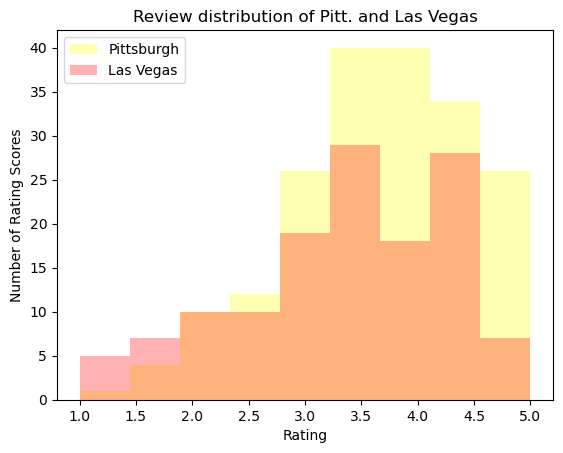

In [37]:
plt.hist(   
    pitts_stars,
    alpha = 0.3 ,   
    color = 'yellow' ,
    label = 'Pittsburgh' ,
    bins = 'auto'   
)

plt.hist(
    vegas_stars,
    alpha = 0.3 , 
    color = 'red' ,
    label = 'Las Vegas' ,
    bins = 'auto'     
)

plt.xlabel('Rating')
plt.ylabel('Number of Rating Scores')

plt.legend(loc = 'best')  

plt.title('Review distribution of Pitt. and Las Vegas')

plt.show()  

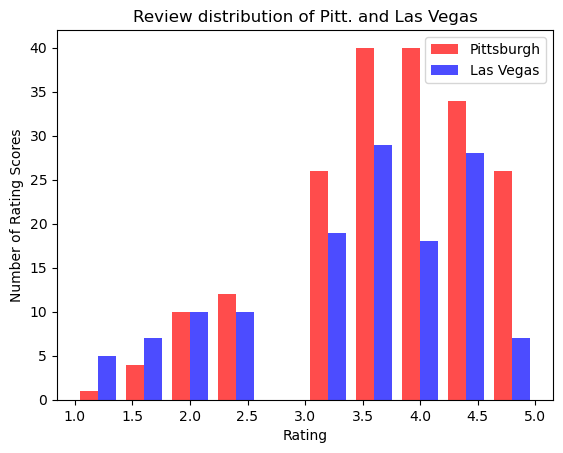

In [41]:
plt.hist(
    [pitts_stars, vegas_stars],
    alpha = 0.7,
    color = ['red', 'blue'],
    label = ['Pittsburgh', 'Las Vegas'],
    bins = 'auto'
)

plt.xlabel('Rating')
plt.ylabel('Number of Rating Scores')

plt.legend(loc = 'best')

plt.title('Review distribution of Pitt. and Las Vegas')

plt.show()

In [41]:
df_health = df[df['category_0'] == 'Health & Medical']
df_fast = df[df['category_0'] == 'Fast Food']
df_break = df[df['category_0'] == 'Breakfast & Brunch']
df_break.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
24,Gab & Eat,Breakfast & Brunch,Sandwiches,True,69,4.5,3,1,Carnegie,PA
131,Crepes Parisiennes,Breakfast & Brunch,Creperies,True,73,4.0,8,1,Pittsburgh,PA
240,Ritters Diner,Breakfast & Brunch,American (Traditional),True,146,3.5,8,1,Pittsburgh,PA
266,The Bloomfield Sandwich Shop,Breakfast & Brunch,Sandwiches,True,41,4.0,8,1,Pittsburgh,PA
268,The Dor-Stop Restaurant,Breakfast & Brunch,Diners,True,275,4.5,8,1,Pittsburgh,PA


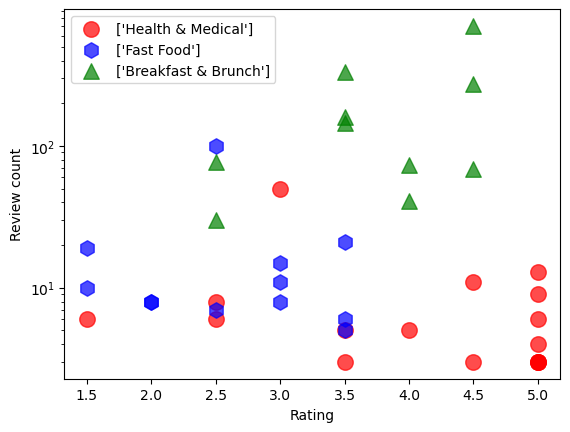

In [43]:
plt.scatter(
    df_health['stars'], df_health['review_count'],
    marker = 'o',   
    color = 'r',  
    alpha = 0.7,
    s = 124,   
    label = ['Health & Medical']
)

plt.scatter(
    df_fast['stars'], df_fast['review_count'],
    marker = 'h',   
    color = 'b',   
    alpha = 0.7,
    s = 124,  
    label = ['Fast Food']
)

plt.scatter(
    df_break['stars'], df_break['review_count'],
    marker = '^',   
    color = 'g',   
    alpha = 0.7,
    s = 124,   
    label = ['Breakfast & Brunch']
)

plt.xlabel('Rating')
plt.ylabel('Review count')

plt.legend(loc = 'upper left')   

axes = plt.gca()  
axes.set_yscale('log')  

plt.show()

In [45]:
df_fast

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
144,Eat'n Park Restaurant,Fast Food,American (Traditional),True,21,3.5,8,1,Pittsburgh,PA
263,Taco Bell,Fast Food,Mexican,True,6,3.5,8,1,Pittsburgh,PA
328,Panda Express,Fast Food,Chinese,True,5,3.5,11,2,Henderson,NV
382,Chipotle Mexican Grill,Fast Food,Mexican,True,100,2.5,11,2,Henderson,NV
383,Taco Bell,Fast Food,Mexican,True,15,3.0,11,2,Henderson,NV
411,Subway,Fast Food,Sandwiches,False,7,2.5,11,2,Henderson,NV
412,Subway,Fast Food,Sandwiches,True,8,3.0,11,2,Henderson,NV
464,KFC,Fast Food,Chicken Wings,True,19,1.5,12,2,Las Vegas,NV
540,Subway,Fast Food,Sandwiches,True,8,2.0,12,2,Las Vegas,NV
571,KFC,Fast Food,Chicken Wings,True,10,1.5,13,2,North Las Vegas,NV
